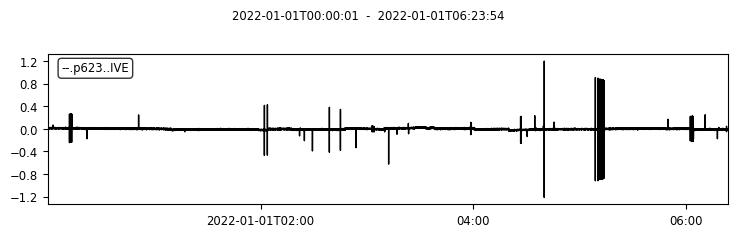

intial_list [ 0.01336608  0.01437125  0.00435742 ..., -0.00889099 -0.00049582
 -0.00240766]
[ 0.00100517 -0.01001383  0.02348617 ..., -0.00472283  0.00839517
 -0.00191183]


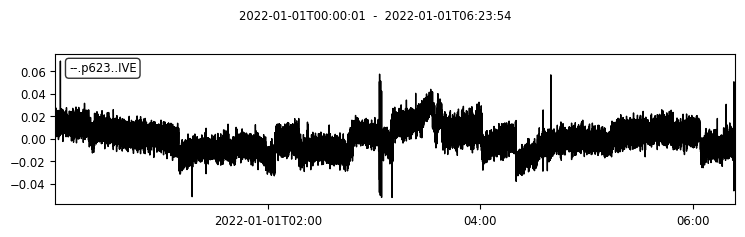

[ 0.09841017  0.09676417  0.09573417 ...,  0.          0.
  0.        ]
[ 0.00463183  0.00463117  0.00463083 ...,  0.          0.
  0.        ]
0.00223550023935


In [57]:
######## GNSS GNSS cross-correlation ##################


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

# READ INSTAVEL ASCII FILE
infile = '/home/rparameswaran/MSnoise_Backup/gnss_12hr/p623_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'p623'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt, dt+43200)
st_gnss_ve[0].plot()
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.07:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.07:
        st_gnss_ve[0].data[i] = 0

d = st_gnss_ve[0].copy()
x = d.data 
# printing iniial_list
print("intial_list", str(x))
 
# Calculating difference list
diff_list = np.diff(x)
 
# printing difference list
#print ("difference list: ", str(diff_list))
print(diff_list)
#d.differentiate(method='gradient')
st_gnss_ve[0].plot()
#d.plot()
#x = d.data
#print (x)
x_a = np.absolute(diff_list)
x_sort = np.sort(x_a)[::-1]
print (x_sort)
idx = list(range(15000, 23033, 1))
x_new = x_sort[idx]
print(x_new)
x_mean = np.mean(x_new)
print(x_mean)
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.07:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.07:
        st_gnss_ve[0].data[i] = 0
#st_gnss_ve[0].plot()



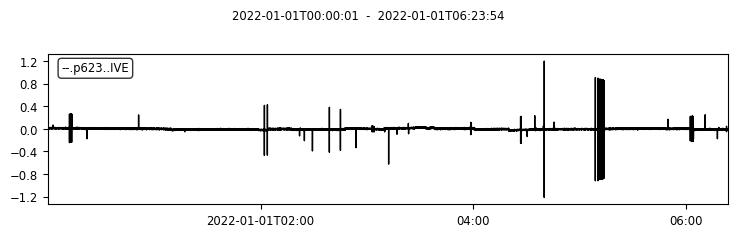

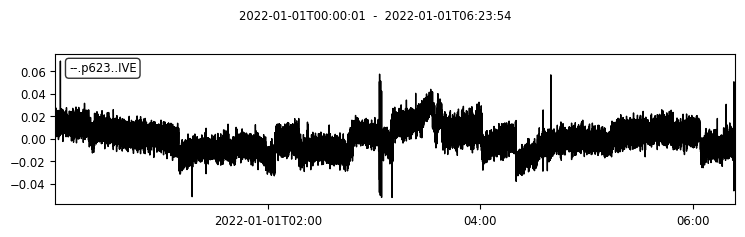

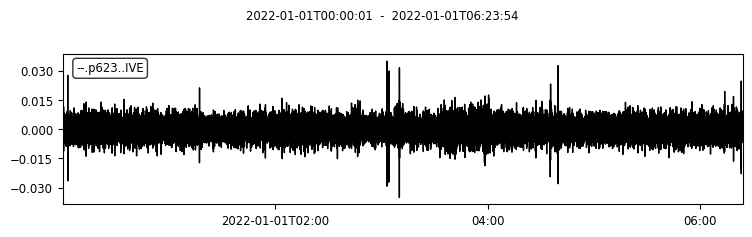

[ 0.00100517 -0.00450433  0.00673617 ...,  0.00183617  0.00324167
 -0.00191183]
[ 0.03495833  0.03482367  0.03253417 ...,  0.          0.
  0.        ]
[ 0.00514783  0.00514733  0.00514733 ...,  0.          0.
  0.        ]
0.00224810333397


In [44]:
######## GNSS GNSS cross-correlation ##################


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

# READ INSTAVEL ASCII FILE
infile = '/home/rparameswaran/MSnoise_Backup/gnss_12hr/p623_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'p623'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt, dt+43200)
st_gnss_ve[0].plot()
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.07:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.07:
        st_gnss_ve[0].data[i] = 0

d = st_gnss_ve[0].copy()
d.differentiate(method='gradient')
st_gnss_ve[0].plot()
d.plot()
x = d.data
print (x)
x_a = np.absolute(x)
x_sort = np.sort(x_a)[::-1]
print (x_sort)
idx = list(range(5000, 23034, 1))
x_new = x_sort[idx]
print(x_new)
x_mean = np.mean(x_new)
print(x_mean)
#st_gnss_ve[0].plot()



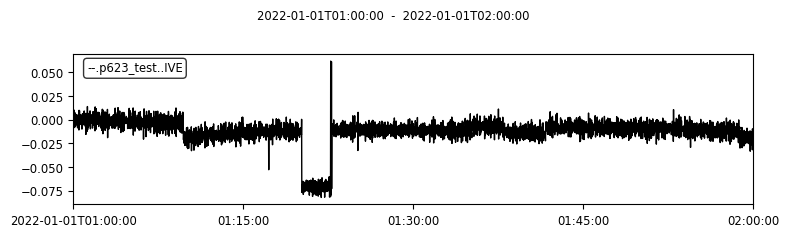

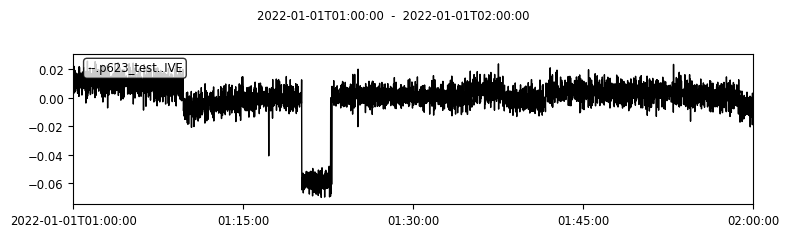

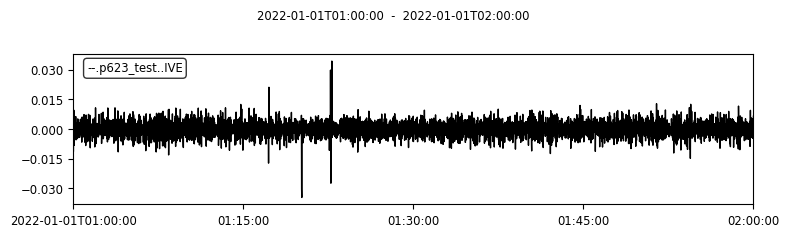

[-0.0110787 -0.0005407  0.0095428 ..., -0.0002897  0.0004898  0.0064993]
[  3.45646985e-02   3.43513015e-02   3.03391985e-02 ...,   5.80148466e-06
   5.69851534e-06   5.69851534e-06]


IndexError: index 5000 is out of bounds for axis 0 with size 3601

In [47]:
######## GNSS GNSS cross-correlation ##################


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

# READ INSTAVEL ASCII FILE
infile = '/home/rparameswaran/MSnoise_Backup/gnss_12hr/p623_1hz.L2.igr_test.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'p623_test'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt+3600, dt+7200)
st_gnss_ve[0].plot()
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.07:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.07:
        st_gnss_ve[0].data[i] = 0

d = st_gnss_ve[0].copy()
d.differentiate(method='gradient')
st_gnss_ve[0].plot()
d.plot()
x = d.data
print (x)
x_a = np.absolute(x)
x_sort = np.sort(x_a)[::-1]
print (x_sort)
idx = list(range(5000, 23034, 1))
x_new = x_sort[idx]
print(x_new)
x_mean = np.mean(x_new)
print(x_mean)
#st_gnss_ve[0].plot()



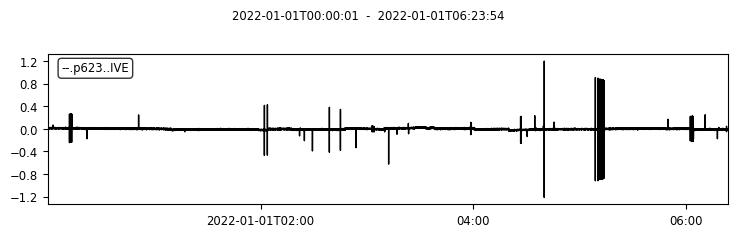

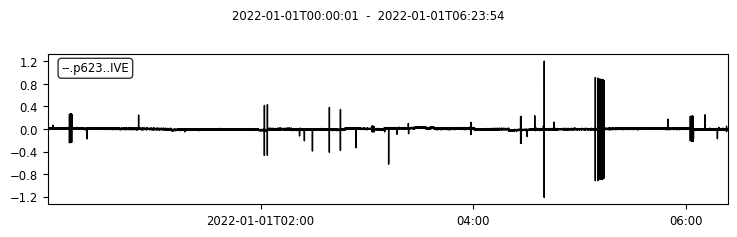

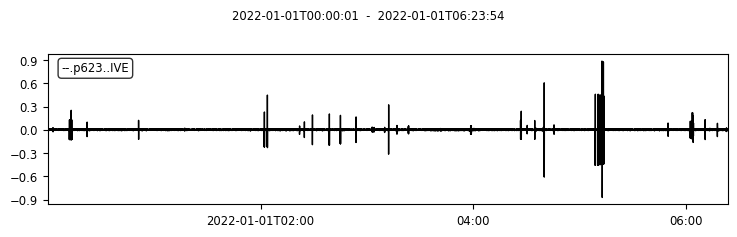

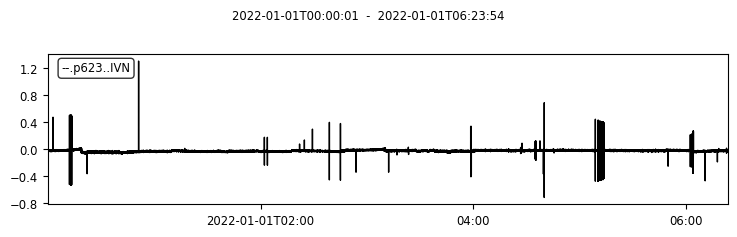

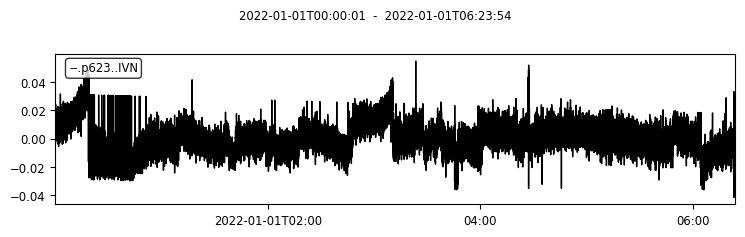

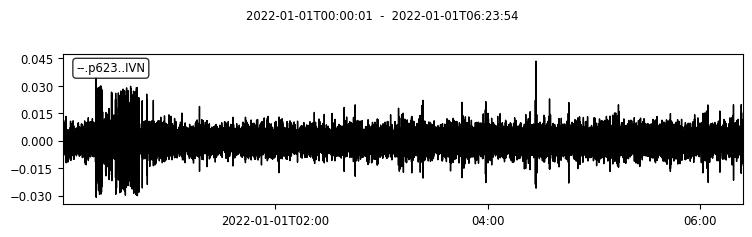

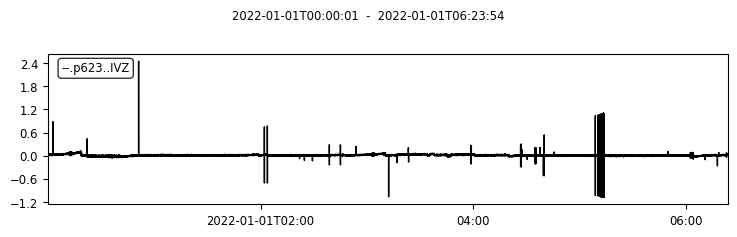

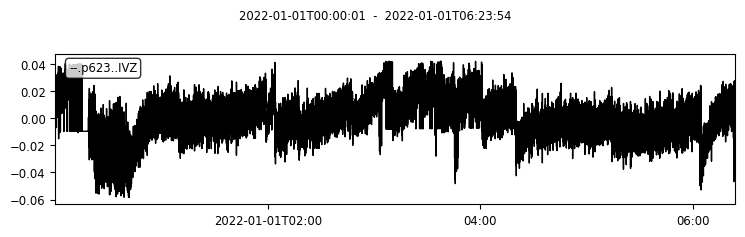

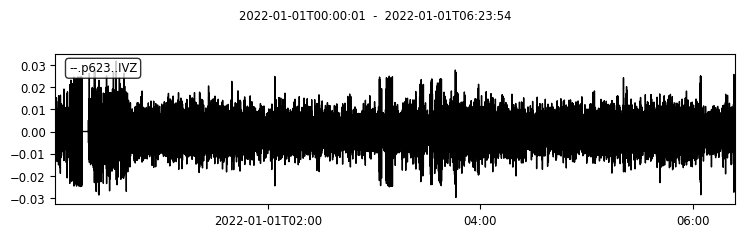

/home/rparameswaran/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


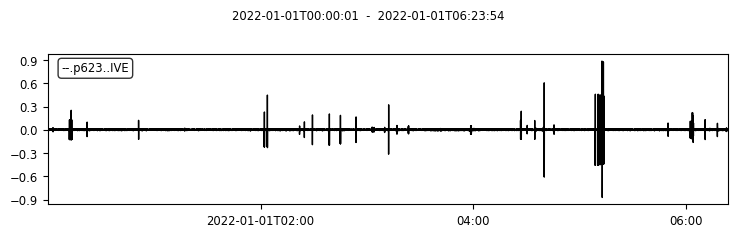

/home/rparameswaran/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


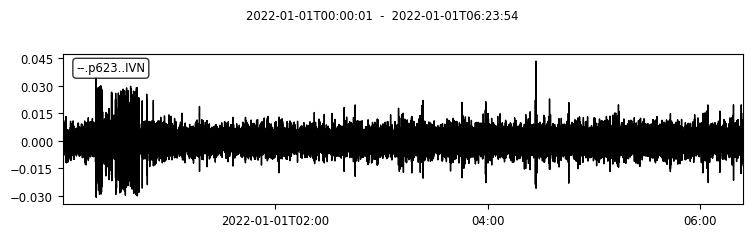

/home/rparameswaran/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (0.5) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


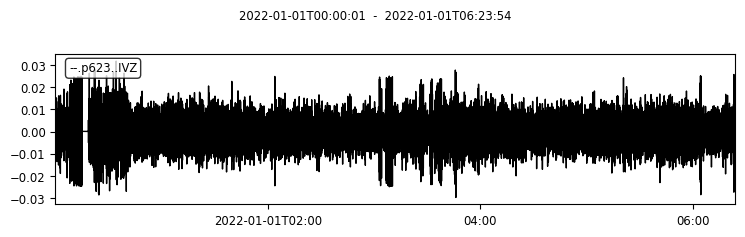

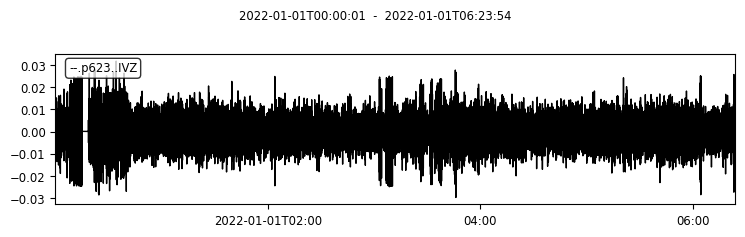

In [13]:
######## GNSS GNSS cross-correlation ##################


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

# READ INSTAVEL ASCII FILE
infile = '/home/rparameswaran/MSnoise_Backup/gnss_12hr/p623_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'p623'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt, dt+43200)
st_gnss_ve[0].plot()

#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
st_gnss_ve[0].plot()
st_gnss_ve[0].differentiate(method='gradient')
x = 
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.025:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.025:
        st_gnss_ve[0].data[i] = 0
#st_gnss_ve[0].taper(0.85, type="cosine")
st_gnss_ve[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'p623'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt, dt+43200)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.06:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.06:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
st_gnss_vn[0].plot()
st_gnss_vn[0].differentiate(method='gradient')
#st_gnss_vn[0].taper(0.5,type="cosine")
st_gnss_vn[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'p623'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt, dt+43200)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
st_gnss_vz[0].plot()
st_gnss_vz[0].differentiate(method='gradient')
#st_gnss_vz[0].taper(0.85,type="cosine")
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.001, freqmax=0.5, corners=4, zerophase=True)
st_gnss_fe.plot()
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.001, freqmax=0.5, corners=4, zerophase=True)
st_gnss_fn.plot()
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.001, freqmax=0.5, corners=4, zerophase=True)
st_gnss_fz.plot()

